# 머신러닝 과제 2 : 2019104035 장서연

## 3. RNN을 사용한 시계열 예측

(1) 코사인 신호의 시계열을 생성한다.<br>
(2) 훈련 세트와 테스트 세트로 나눈다.<br>
(3) 데이터를 전처리 한다.<br>
(4) 모델 구성<br>
<pre>Sequential
LSTM(32, )
Dropout(0.3)
Dense(1) </pre>
(5) 모델 학습 과정 설정
<pre>비용함수(MSE)
Optimizer(adam)</pre>
(6) 모델 학습시키기
<pre>epoch(200)</pre>
(7) 모델 평가<br>
(8) 훈련에서 비용 함수와 테스트에서 비용함수를 epoch에 대하여 그래프로 나타낸다.<br>
(9) 테스트 시계열과 예측된 시계열을 비교하여 그래프로 그린다.<br>


<b>(1) 코사인 신호의 시계열을 생성한다.

In [3]:
import numpy as np

signal_data = np.cos(np.arange(1600)*(20 * np.pi/1000))[:,None]

In [7]:
print(signal_data.shape)
print(signal_data)

(1600, 1)
[[1.        ]
 [0.99802673]
 [0.9921147 ]
 ...
 [0.98228725]
 [0.9921147 ]
 [0.99802673]]


생성 데이터가 어떻게 생겼을지 궁금하네요. 그래프로 나타내보겠습니다.

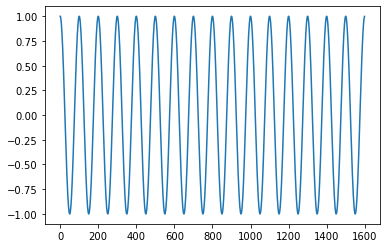

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

plot_x = np.arange(1600)
plot_y = signal_data
plt.plot(plot_x, plot_y)
plt.show()

<b>(2) 훈련 세트와 테스트 세트로 나눈다.<br>
(3) 데이터를 전처리 한다.

시계열을 예측하는 회귀 문제이기 때문에, 이 함수를 데이터 부분(x에 해당)과 label(y에 해당) 부분으로 나눠야 합니다.<br>
x 에 해당하는 데이터는 이전 수치, label(y에 해당하는 데이터) 은 다음 수치!<br>
x, y 로 나뉘는 데이터를 먼저 구성해봅시다

In [8]:

def create_dataset(signal_data, look_back = 1):
    dataX, dataY = [], []
    for i in range (len(signal_data) - look_back):
        dataX.append(signal_data[i:(i+look_back), 0]) #만약에 i= 0이면 x에는 signal_data의 0번째 요소가
        dataY.append(signal_data[i+look_back, 0]) #y에는 1번빼 요소가 들어가서 1대 1로 대응되게 되는 것이죠
    return np.array(dataX), np.array(dataY)


In [10]:
# 데이터 전처리1. 정규화

from sklearn.preprocessing import MinMaxScaler

look_back = 40 #이전 수치 40개를 입력받아, 다음 수치 1개를 예측

scaler = MinMaxScaler(feature_range = (0,1))
signal_data = scaler.fit_transform(signal_data)

# 데이터 전처리 2. 데이터, 훈련셋과 시험, 검증셋 분리

train = signal_data[0:800]
val = signal_data[800:1200]
test = signal_data[1200:]

# 이건 라벨이 붙지않은 데이터 그 자체니까, 아까 위에서 만들어준 함수로 나눠 봅시다.

x_train, y_train = create_dataset(train, look_back)
x_val, y_val = create_dataset(val, look_back)
x_test, y_test = create_dataset(test, look_back)

In [11]:
# 데이터셋 전처리 3

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1)) 
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1)) 
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1)) 

<b>(4) 모델 구성</b>

Sequential<br>
LSTM(32, )<br>
Dropout(0.3)<br>
Dense(1) 

In [12]:
# 모델 구성, RNN 구조에서 LSTM 셀을 이용해봅시다!

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential()
model.add(LSTM(32, input_shape=(None,1)))
model.add(Dropout(0.3))
model.add(Dense(1))



Using TensorFlow backend.
C:\ProgramData\Anaconda3\envs\venv\lib\site-packages\tensorflow\python\framework\dtypes.py:493: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\envs\venv\lib\site-packages\tensorflow\python\framework\dtypes.py:494: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\envs\venv\lib\site-packages\tensorflow\python\framework\dtypes.py:495: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\envs\venv\lib\site-packag

<b>(5) 모델 학습 과정 설정</b>

비용함수(MSE)<br>
Optimizer(adam)

In [14]:

model.compile(loss = 'mean_squared_error', optimizer = 'adam')


<b>(6) 모델 학습시키기</b>

epoch(200)

In [15]:


hist = model.fit(x_train, y_train, epochs = 200, batch_size = 32, validation_data= (x_val, y_val))


Train on 760 samples, validate on 360 samples
Epoch 1/200
760/760 [==============================] - 2s 2ms/step - loss: 0.3115 - val_loss: 0.0731
Epoch 2/200
760/760 [==============================] - 1s 951us/step - loss: 0.0596 - val_loss: 0.0410
Epoch 3/200
760/760 [==============================] - 1s 934us/step - loss: 0.0385 - val_loss: 0.0245
Epoch 4/200
760/760 [==============================] - 1s 736us/step - loss: 0.0253 - val_loss: 0.0129
Epoch 5/200
760/760 [==============================] - 1s 926us/step - loss: 0.0159 - val_loss: 0.0036
Epoch 6/200
760/760 [==============================] - 1s 971us/step - loss: 0.0136 - val_loss: 0.0022
Epoch 7/200
760/760 [==============================] - 1s 929us/step - loss: 0.0097 - val_loss: 0.0013
Epoch 8/200
760/760 [==============================] - 1s 934us/step - loss: 0.0081 - val_loss: 0.0013
Epoch 9/200
760/760 [==============================] - 1s 836us/step - loss: 0.0075 - val_loss: 6.9578e-04
Epoch 10/200
760/760 [===

760/760 [==============================] - 1s 1ms/step - loss: 0.0020 - val_loss: 6.5860e-05
Epoch 154/200
760/760 [==============================] - 1s 1ms/step - loss: 0.0020 - val_loss: 3.2660e-05
Epoch 155/200
760/760 [==============================] - 1s 754us/step - loss: 0.0023 - val_loss: 1.1296e-04
Epoch 156/200
760/760 [==============================] - 1s 832us/step - loss: 0.0021 - val_loss: 1.1306e-04
Epoch 157/200
760/760 [==============================] - 1s 986us/step - loss: 0.0020 - val_loss: 2.3914e-05
Epoch 158/200
760/760 [==============================] - 1s 1ms/step - loss: 0.0020 - val_loss: 2.7065e-04
Epoch 159/200
760/760 [==============================] - 1s 868us/step - loss: 0.0020 - val_loss: 2.4349e-05
Epoch 160/200
760/760 [==============================] - 1s 826us/step - loss: 0.0022 - val_loss: 8.2403e-05
Epoch 161/200
760/760 [==============================] - 1s 979us/step - loss: 0.0020 - val_loss: 1.0565e-04
Epoch 162/200
760/760 [================

<b>(7) 모델 평가<br>
(8) 훈련에서 비용 함수와 테스트에서 비용함수를 epoch에 대하여 그래프로 나타낸다.


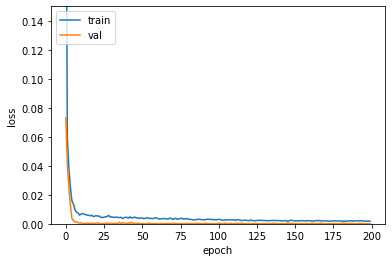

In [16]:
#학습과정을 살펴보고, 모델을 평가합니다

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.ylim(0.0, 0.15)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc = 'upper left')
plt.show()

epoch 수가 커질 수록 성능도 좋아지긴 하지만, 150정도로만 해도 충분할 것 같습니다. 메모리도 아낄 수 있구요!

In [17]:
trainScore = model.evaluate(x_train, y_train, verbose = 0)
model.reset_states()
print("Train Score: ", trainScore)


valScore = model.evaluate(x_val, y_val, verbose = 0)
model.reset_states()
print("Validation Score: ", valScore)

testScore = model.evaluate(x_test, y_test, verbose = 0)
model.reset_states()
print("Test Score: ", testScore)

Train Score:  0.00011886256451314119
Validation Score:  0.00011438351389693303
Test Score:  0.00011438351389693303


<b>(9) 테스트 시계열과 예측된 시계열을 비교하여 그래프로 그린다.

In [18]:
#테스트 시계열 생성해서 대입해보기

look_ahead = 250;
xhat = x_test[0]
predictions = np.zeros((look_ahead, 1))
for i in range(look_ahead):
    prediction = model.predict(np.array([xhat]), batch_size = 1)
    predictions[i] = prediction
    xhat = np.vstack([xhat[1:], prediction])

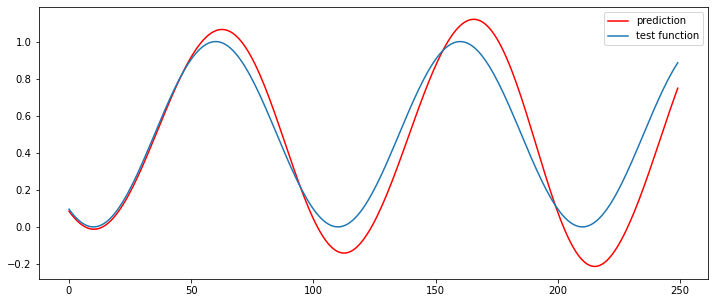

In [19]:
plt.figure(figsize = (12, 5))
plt.plot(np.arange(look_ahead), predictions, 'r', label = 'prediction')
plt.plot(np.arange(look_ahead), y_test[:look_ahead], label = "test function")
plt.legend()
plt.show()

시계열 초반엔 동일하지만 가면 갈 수록 오차가 누적되어서, <b>함수의 진폭과 파장 모두 조금씩 커져가는 현상</b>을 관찰 가능하네요.